# Suma de variables uniformes

Ejemplo del teorema central del límite. El código simula muchas variables continuas con distribución uniforme entre 0 y 1. Luego construye un histograma de frecuencias con la suma de las variables y lo compara con una distribución Normal.

$X = \sum_{i=1}^{n} X_i, \; X_i \sim \mathrm{U}(0,1)$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Simulación Monte Carlo

Número de variables a sumar

In [2]:
nvariables = 10

Número de simulaciones

In [3]:
nsimulations = 100000

Generador de números aleatorios

In [4]:
rng = np.random.default_rng(seed=6870)

Arreglo para guardar los datos

In [5]:
data = []

In [6]:
for i in range(nsimulations):
    # print("Iteración ", i)
    x = rng.random(size=nvariables)     # distribución uniforme [0,1)
    # print("x = ", x)
    x_sum = x.sum()
    # print("z = ", z)
    data.append(x_sum)

## Momentos de X

In [7]:
mu = nvariables / 2
print(f'Media: {mu}')

Media: 5.0


In [8]:
sigma = math.sqrt(nvariables/12)
print(f'Desviación estándar: {sigma}')

Desviación estándar: 0.9128709291752769


## Histograma de frecuencia

In [9]:
xmin, xmax = mu-2*sigma, mu+2*sigma
histo, bin_edges = np.histogram(data, bins=20, range=[xmin, xmax])

## Distribución Normal

Normalización de la distribución

In [10]:
xbin = ( bin_edges[:-1] + bin_edges[1:] ) / 2
# same width for all bins
bin_width = bin_edges[1] - bin_edges[0]
scale_factor = nsimulations * bin_width
scale_factor

18257.418583505558

In [11]:
x = np.linspace(xmin, xmax, 100)
y = scale_factor * norm.pdf(x, loc=mu, scale=sigma)

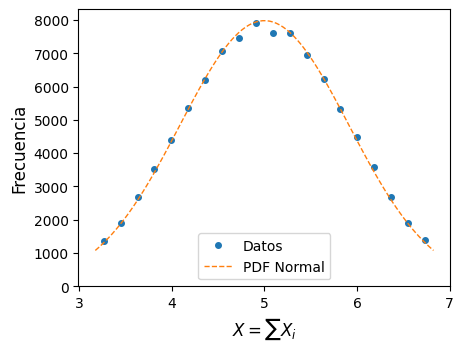

In [12]:
fig, ax = plt.subplots()
ax.set_xlabel("$X = \sum X_i$")
ax.set_ylabel("Frecuencia")
ax.plot(xbin, histo, ls='None', marker='o', label="Datos")
ax.plot(x, y, ls='--', label="PDF Normal")
ax.set_ylim(bottom=0)
ax.legend()